In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("full_synthetic_spam_email_dataset.csv")
print("Dataset Loaded")
print(df.head())

Dataset Loaded
                               email_id                      sender  \
0  f95de931-7770-4c5f-83bf-019c9757839f    noreply@workfromhome.biz   
1  10199a4d-f36f-4bd4-8485-bbb4f946cc9f  billing@onlinewarranty.org   
2  453c33d4-37e0-4bef-b5c4-2fff329acf94      offers@loanexpress.net   
3  23f3ef8d-cf39-4895-91f6-1e3776e1374c        admin@intranet.local   
4  b7a3e249-9c0c-48e2-becf-8c6bd248ecc5      manager@teamproject.io   

                     subject  \
0          Win a Free iPhone   
1          Win a Free iPhone   
2          Win a Free iPhone   
3        Team Lunch Reminder   
4  Updated Document Attached   

                                                text  spam  
0  Claim your free iPhone by filling out this sho...     1  
1  You have been selected for a limited time loan...     1  
2  Your payment is pending. Click here to confirm...     1  
3       Don't forget to submit your timesheet today.     0  
4       Don't forget to submit your timesheet today.     0  

In [3]:
X = df['text']
y = df['spam']

In [4]:
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_vect = vectorizer.fit_transform(X)
print("\nTF-IDF vectorization complete. Shape:", X_vect.shape)


TF-IDF vectorization complete. Shape: (1000, 94)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_vect, y, test_size=0.2, random_state=42)
print(f"\nTraining samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")


Training samples: 800, Testing samples: 200


In [6]:
nb = MultinomialNB()
nb.fit(X_train, y_train)
pred_nb = nb.predict(X_test)
print("\n--- Naive Bayes Results ---")
print("Accuracy:", accuracy_score(y_test, pred_nb))
print(classification_report(y_test, pred_nb))


--- Naive Bayes Results ---
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        95
           1       1.00      1.00      1.00       105

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [7]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
pred_lr = lr.predict(X_test)
print("\n--- Logistic Regression Results ---")
print("Accuracy:", accuracy_score(y_test, pred_lr))
print(classification_report(y_test, pred_lr))


--- Logistic Regression Results ---
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        95
           1       1.00      1.00      1.00       105

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [8]:
svm = LinearSVC()
svm.fit(X_train, y_train)
pred_svm = svm.predict(X_test)
print("\n--- Support Vector Machine (SVM) Results ---")
print("Accuracy:", accuracy_score(y_test, pred_svm))
print(classification_report(y_test, pred_svm))


--- Support Vector Machine (SVM) Results ---
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        95
           1       1.00      1.00      1.00       105

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [9]:
models = ['Naive Bayes', 'Logistic Regression', 'SVM']
accuracies = [
    accuracy_score(y_test, pred_nb),
    accuracy_score(y_test, pred_lr),
    accuracy_score(y_test, pred_svm)
]

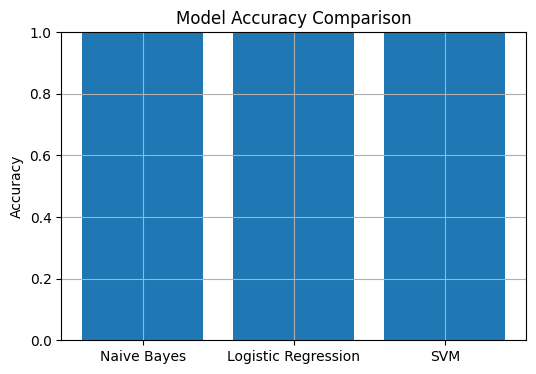

In [11]:
plt.figure(figsize=(6, 4))
plt.bar(models, accuracies)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.grid(True)
plt.show()